<a id='sommaire'></a>
<h1 style='text-align:center'>ANALYSE DES DONN&Eacute;ES</h1>

[variable sexe](#variable_sex)  
[vaiable âge](#variable_age)  
[indice de Gini et courbe de Lorenz - âge](#gini1)  
[variable categ](#variable_categ)  
[variable price (indicateurs de tendances)](#variable_price)  
[indice de Gini et courbe de Lorenz - prix](#variable_price1)  
[répartition des prix](#variable_price2)  
[répartition par tranche de prix](#variable_price3)  
[ventes en fonction du moment de la journée](#ventes_partie_jour)  
[ventes journalières](#ventes_journ)  
[ventes mensuelles](#ventes_mens)  
[séries temporelles](#serie_temp)  
[Séries temporelles septembre, octobre et novembre](#serie_temp1)  
[corrélation sex_categ](#sex_categ)  
[corrélation âge montant des achats](#age_montant)  
[corrélation âge fréquence d'achat mensuelle](#age_freq_mens)  
[corrélation âge panier moyen](#age_panier)  
[corrélation entre âge et catégorie](#age_categ)

## Analyses univariées

<h3 style='color:#8677b2'>Import des CSV</h3>

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.dates as mdates
import scipy.stats as st
import statsmodels.api as sm
import os

os.makedirs('graph', exist_ok=True)

vente = pd.read_csv("vente.csv", dtype={'categ':np.int32})

client_sans_achat = pd.read_csv('client_sans_achat.csv')
produit_non_ref = pd.read_csv('produit_non_ref.csv')
produit_non_vendu = pd.read_csv('produit_non_vendu.csv', dtype={'categ':np.int32})

plt.rcParams.update({'font.size': 15})

<a id='variable_sex'></a>
<h3 style='color:#8677b2'>La variable sex</h3>

[Haut de page](#sommaire)

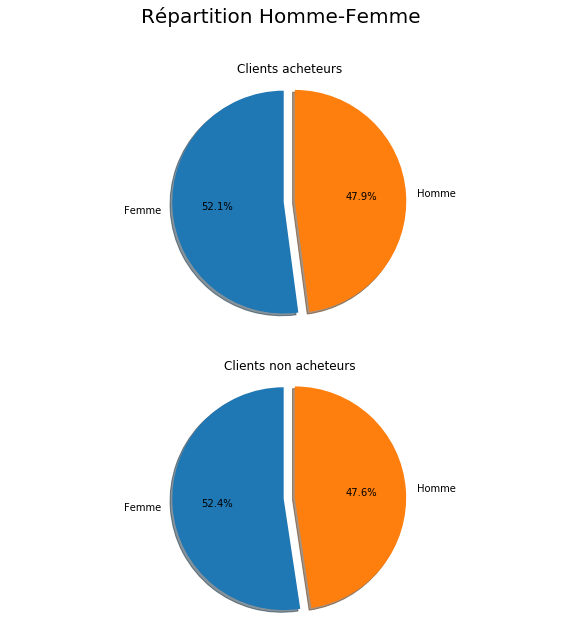

In [2]:
client_acheteur = vente.groupby(['client_id', 'sex', 'age'], as_index=False).count()

labels = 'Femme', 'Homme'

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

fig.suptitle('Répartition Homme-Femme', fontsize=20)


ax1.pie(client_acheteur['sex'].value_counts(),
        explode = (0, 0.1),
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90)

ax1.set_title('Clients acheteurs')

ax1.axis('equal')

ax2.pie(client_sans_achat['sex'].value_counts(),
        explode = (0, 0.1),
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90)
ax2.set_title('Clients non acheteurs')

ax2.axis('equal')

plt.savefig('graph/01_Répartition_Homme_Femme.jpg')
plt.show()

<p style='color:#8677b2;text-align:center'>
    Le poids des deux echantillons n'est pas équivalent, 8 596 individus pour les clients acheteurs et 21 individus pour les clients non acheteurs<br/> 
</p>

<a id='variable_age'></a>
<h3 style='color:#8677b2'>La variable age</h3>

[Haut de page](#sommaire)

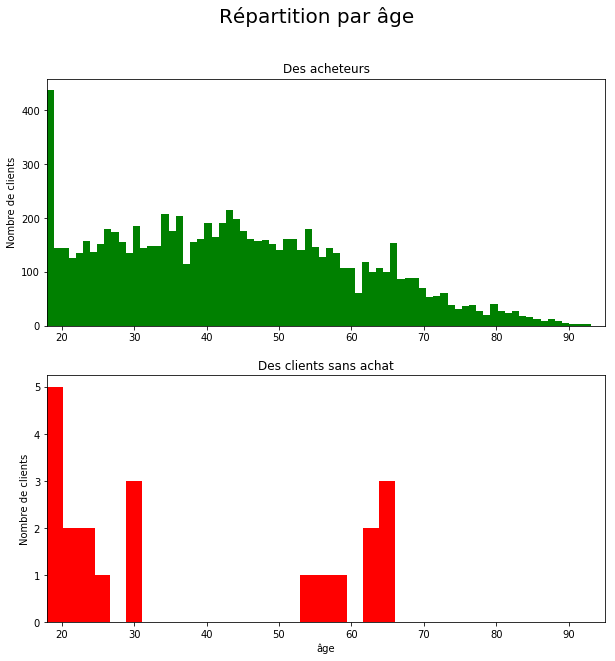

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Répartition par âge', fontsize=20)

ax1.set_title('Des acheteurs')
ax1.set_ylabel('Nombre de clients')
ax1.set_xlim(18,95)
ax1.hist(client_acheteur['age'], bins=76, color='green')

ax2.set_title('Des clients sans achat')
ax2.set_xlabel('âge')
ax2.set_ylabel('Nombre de clients')
ax2.set_xlim(18,95)
ax2.hist(client_sans_achat['age'], bins=22, color='red')

plt.savefig('graph/02_Repartition_par_age.jpg')
plt.show()

<p style='color:#88cc8d;text-align:center'>
    La population des personnes de 18 ans la plus représentée<br/> 
</p>

<p style='color:#8677b2;text-align:center'>
    Le poids des deux echantillons n'est pas équivalent, 8 600 individus pour les clients acheteur et 21 individus pour les clients non acheteurs<br/> 
</p>

<a id='variable_categ'></a>
<h3 style='color:#8677b2'>La variable categ</h3>

[Haut de page](#sommaire)

In [4]:
produit_non_vendu1 = produit_non_vendu.groupby('categ', as_index=False).count()

produit_non_vendu1.sort_values(by='id_prod', inplace=True)

produit_non_vendu1['freq_mens'] = produit_non_vendu1['id_prod'] / produit_non_vendu1['id_prod'].sum()

produit_non_vendu1['freq_cum_categ'] = produit_non_vendu1['freq_mens'].cumsum()

produit_non_vendu1.head(3)

,categ,id_prod,price,tranche de prix,freq_mens,freq_cum_categ
1,1,2,2,2,0.090909,0.090909
2,2,3,3,3,0.136364,0.227273
0,0,17,17,17,0.772727,1.000000


In [5]:
produit_vendu = vente.groupby('categ', as_index=False).count()

produit_vendu.sort_values(by='id_prod', inplace=True)

produit_vendu['freq_cum_categ'] = produit_vendu['id_prod'].cumsum()/len(vente)

produit_vendu.head(3)

,categ,id_prod,date,session_id,client_id,session_date,jour_sem,nom_mois,heure,partie_jour,...,age,tranche d'age,tranche d'age1,price,tranche de prix,taille_panier_session,achat_mens,achat_an,freq_mens,freq_cum_categ
2,2,15756,15756,15756,15756,15756,15756,15756,15756,15756,...,15756,15756,15756,15756,15756,15756,15756,15756,15756,0.050250
1,1,102625,102625,102625,102625,102625,102625,102625,102625,102625,...,102625,102625,102625,102625,102625,102625,102625,102625,102625,0.377548
0,0,195171,195171,195171,195171,195171,195171,195171,195171,195171,...,195171,195171,195171,195171,195171,195171,195171,195171,195171,1.000000


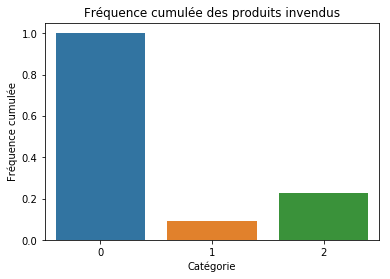

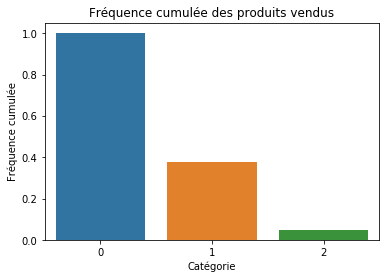

In [6]:
sns.barplot(produit_non_vendu1['categ'], produit_non_vendu1['freq_cum_categ'])
plt.title('Fréquence cumulée des produits invendus')
plt.ylabel('Fréquence cumulée')
plt.xlabel('Catégorie')

plt.savefig('graph/03_Fréquence_des_produits_invendus.jpg')
plt.show()

sns.barplot(produit_vendu['categ'], produit_vendu['freq_cum_categ'])
plt.title('Fréquence cumulée des produits vendus')
plt.ylabel('Fréquence cumulée')
plt.xlabel('Catégorie')

plt.savefig('graph/04_Frequence_des_produits_vendus.jpg')
plt.show()

<p style='color:#8677b2;text-align:center'>
    Le poids des deux echantillons n'est pas équivalent, 22 individus pour les produits non vendus et 3 264 individus pour les produits vendu<br/> 
</p>

<a id='variable_price'></a>
<h3 style='color:#8677b2'>Indicateurs de tendances centrales et mesures de dispersions appliquées à la variable price</h3>

[Haut de page](#sommaire)

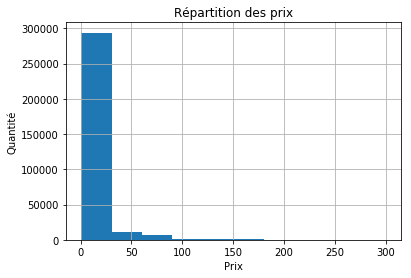

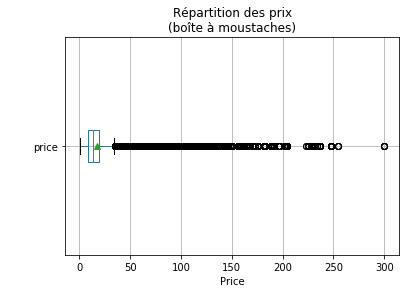

--------------------
moyenne générale:
 17.102978006895892
moyenne de la catégorie 0:
 10.645049776858151
--------------------
médiane générale:
 13.83
médiane de la catégorie 0:
 9.99
--------------------
mode générale:
 15.99
mode de la catégorie 0:
 4.99
--------------------
variance empirique générale:
 309.64795136786785
variance empirique de la catégorie 0:
 24.28652896173471
--------------------
écart type empirique générale:
 17.59681651230892
écart type empirique de la catégorie 0:
 4.928136459325645
--------------------
coefficient de variation générale:
 1.0288744162106689
coefficient de variation de la catégorie 0:
 0.46295100188626526
--------------------
skewness empirique générale:
 5.54100245040267
skewness empirique de la catégorie 0:
 0.42530938946354113
--------------------
kurtosis empirique générale:
 46.65500519779655
kurtosis empirique de la catégorie 0:
 -0.3790827999370303
--------------------


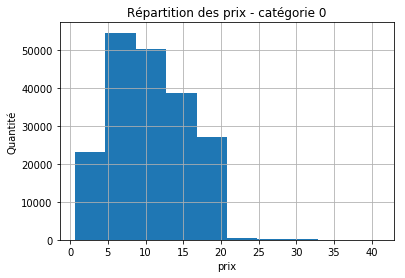

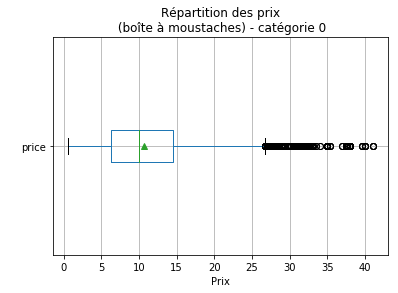

--------------------
moyenne générale:
 17.102978006895892
moyenne de la catégorie 1:
 20.47829807551604
--------------------
médiane générale:
 13.83
médiane de la catégorie 1:
 19.08
--------------------
mode générale:
 15.99
mode de la catégorie 1:
 15.99
--------------------
variance empirique générale:
 309.64795136786785
variance empirique de la catégorie 1:
 57.33375331295436
--------------------
écart type empirique générale:
 17.59681651230892
écart type empirique de la catégorie 1:
 7.571905527207425
--------------------
coefficient de variation générale:
 1.0288744162106689
coefficient de variation de la catégorie 1:
 0.36975267667680034
--------------------
skewness empirique générale:
 5.54100245040267
skewness empirique de la catégorie 1:
 1.7168805164809864
--------------------
kurtosis empirique générale:
 46.65500519779655
kurtosis empirique de la catégorie 1:
 8.047109728034243
--------------------


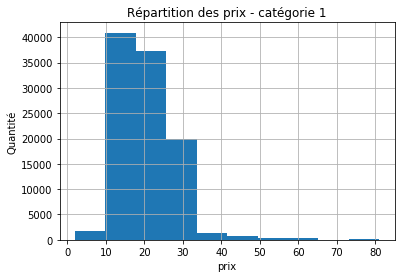

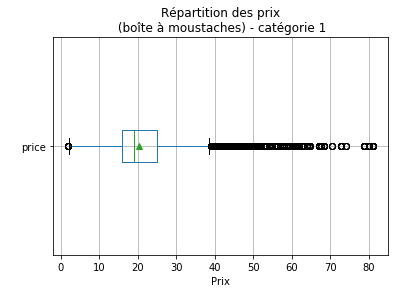

--------------------
moyenne générale:
 17.102978006895892
moyenne de la catégorie 2:
 75.11313848692093
--------------------
médiane générale:
 13.83
médiane de la catégorie 2:
 62.54
--------------------
mode générale:
 15.99
mode de la catégorie 2:
 68.99
--------------------
variance empirique générale:
 309.64795136786785
variance empirique de la catégorie 2:
 1531.8809728803963
--------------------
écart type empirique générale:
 17.59681651230892
écart type empirique de la catégorie 2:
 39.13925105160287
--------------------
coefficient de variation générale:
 1.0288744162106689
coefficient de variation de la catégorie 2:
 0.5210706387727093
--------------------
skewness empirique générale:
 5.54100245040267
skewness empirique de la catégorie 2:
 2.3130531091776154
--------------------
kurtosis empirique générale:
 46.65500519779655
kurtosis empirique de la catégorie 2:
 5.475923138731206
--------------------


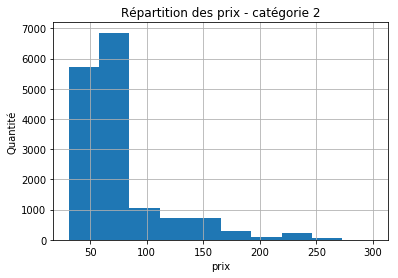

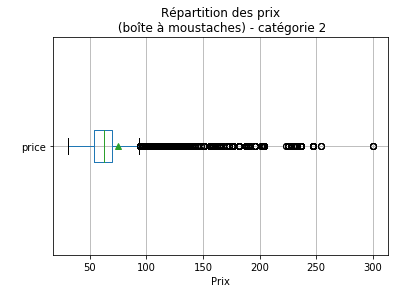

In [7]:
plt.title(f'Répartition des prix')
plt.ylabel('Quantité')
plt.xlabel('Prix')
vente['price'].hist()

plt.savefig('graph/05_Repartition_des_prix.jpg', bbox_inches='tight')
plt.show()

plt.xlabel('Price')
plt.ylabel(' \n ')
plt.title('Répartition des prix\n(boîte à moustaches)')
vente.boxplot(column='price', vert=False, showmeans=True)

plt.savefig('graph/06_Repartition_des_prix_boite_a_moustache.jpg', bbox_inches='tight')
plt.show()

n = 6

for cat in vente['categ'].unique():
    n = n + 1
    subset = vente[vente.categ == cat]
    print('-'*20)
    print('moyenne générale:\n', vente['price'].mean())
    print(f'moyenne de la catégorie {int(cat)}:\n', subset['price'].mean())
    print('-'*20)
    print('médiane générale:\n', vente['price'].median())
    print(f'médiane de la catégorie {int(cat)}:\n', subset['price'].median())
    print('-'*20)
    print('mode générale:\n', vente['price'].mode()[0])
    print(f'mode de la catégorie {int(cat)}:\n', subset['price'].mode()[0])
    print('-'*20)
    print('variance empirique générale:\n', vente['price'].var(ddof=0))
    print(f'variance empirique de la catégorie {int(cat)}:\n', subset['price'].var(ddof=0))
    print('-'*20)
    print('écart type empirique générale:\n', vente['price'].std(ddof=0))
    print(f'écart type empirique de la catégorie {int(cat)}:\n', subset['price'].std(ddof=0))
    print('-'*20)
    print('coefficient de variation générale:\n', vente['price'].std(ddof=0)/vente['price'].mean())
    print(f'coefficient de variation de la catégorie {int(cat)}:\n', subset['price'].std(ddof=0)/subset['price'].mean())
    print('-'*20)
    print('skewness empirique générale:\n', vente['price'].skew())
    print(f'skewness empirique de la catégorie {int(cat)}:\n', subset['price'].skew())
    print('-'*20)
    print('kurtosis empirique générale:\n', vente['price'].kurtosis())
    print(f'kurtosis empirique de la catégorie {int(cat)}:\n', subset['price'].kurtosis())
    print('-'*20)   
    plt.title(f'Répartition des prix - catégorie {int(cat)}')
    plt.ylabel('Quantité')
    plt.xlabel('prix')
    subset['price'].hist()
    
    plt.savefig(f'graph/0{n}_Repartition_des_prix_catégorie_{int(cat)}.jpg', bbox_inches='tight')
    plt.show()
    
    plt.ylabel(' ')
    plt.xlabel('Prix')
    plt.title(f'Répartition des prix\n (boîte à moustaches) - catégorie {int(cat)}')
    subset.boxplot(column='price', vert=False, showmeans=True)
    
    plt.savefig(f'graph/0{n+1}_Repartition_des_prix_boite_a_moustaches_catégorie_{int(cat)}.jpg', bbox_inches='tight')
    plt.show()
    n= n + 1

<p style='color:#88cc8d;text-align:center'>
    Les deux premiers graphiques représentent la distribution du prix toutes catégories confondues<br/>
    Les trois paires suivantes représentent la distribution du prix par catégorie<br/>
    <br/>
    La moyenne des prix est 17.10€<br/>
    Cat 0: 10.65€<br/>
    Cat 1: 20.48€<br/>
    Cat 2: 75.11€<br/>
    <br/>
    La médiane des prix est 13.83€<br/>
    Cat 0: 9.99€<br/>
    Cat 1: 19.08€<br/>
    Cat 2: 62.54€<br/>
    <br/>
    Le mode des prix est 15.99€<br/>
    Cat 0: 4.99€<br/>
    Cat 1: 15.99€<br/>
    Cat 2: 68.99€<br/>
    <br/>
    La variance empirique des prix est 309.65€<sup>2</sup><br/>
    Cat 0: 24.29€<sup>2</sup><br/>
    Cat 1: 57.33€<sup>2</sup><br/>
    Cat 2: 1531.88€<sup>2</sup><br/>
    <br/>
    L'écart type empirique des prix est 17.60€<br/>
    Cat 0: 4.93€<br/>
    Cat 1: 7.57€<br/>
    Cat 2: 39.14€<br/>
    <br/>
    Le coefficient de variation des prix est 1.03<br/>
    Cat 0: 0.46<br/>
    Cat 1: 0.37<br/>
    Cat 2: 0.52<br/>
    <br/>
    Le skewness empirique des prix est 5.54<br/>
    Cat 0: 0.43<br/>
    Cat 1: 1.72<br/>
    Cat 2: 2.31<br/>
    <br/>
    Le kurtosis empirique de la catégorie 0 est -0.38<br/>

<a id='variable_price1'></a>
<h3 style='color:#8677b2'>Courbe de Lorenz et indice de Gini appliqués à la variable price</h3>

[Haut de page](#sommaire)

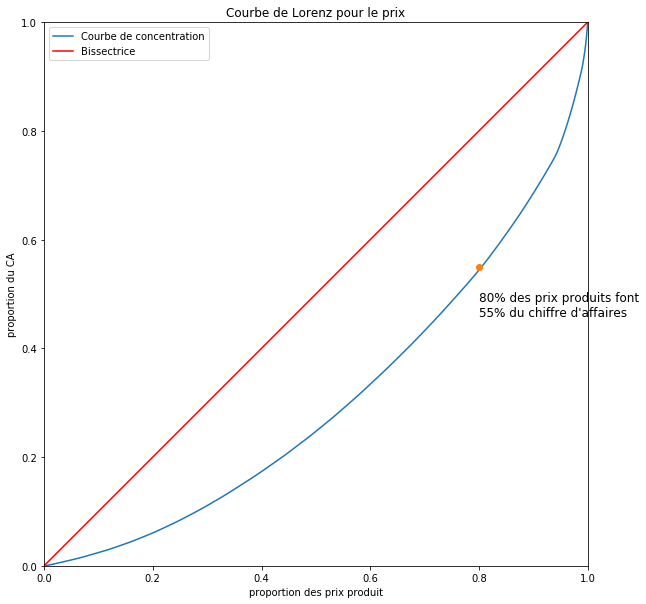

L'indice de Gini est: 0.389269191913837


In [8]:
prix = vente['price'].values

lorenz = np.cumsum(np.sort(prix)) / prix.sum()
lorenz = np.append([0], lorenz)

plt.figure(figsize=(10,10))
plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, drawstyle = 'steps-post')

plt.gca().set_aspect('equal', adjustable = 'box')
labels =['Courbe de concentration', 'Bissectrice']

x = [0, 1]
y = [0, 1]

plt.plot(x, y, 'red')
plt.ylabel('proportion du CA')
plt.xlabel('proportion des prix produit')

plt.ylim(0, 1)
plt.xlim(0, 1)

plt.title('Courbe de Lorenz pour le prix')
plt.legend(labels)

plt.plot(0.8, 0.55, 'o')
plt.text(0.8, 0.46 , '80% des prix produits font\n55% du chiffre d\'affaires', fontsize = '12')

plt.savefig('graph/013_Courbe_de_Lorenz_variable_price.jpg', bb_inches='tight')
plt.show()

aire_ss_courbe = lorenz[:-1].sum() / len(lorenz)

S = 0.5 - aire_ss_courbe
gini = 2 * S
print('L\'indice de Gini est:', gini)

In [9]:
prix1 = np.sort(prix)

g = prix1[0]
h =prix1[int(0.8 * len(prix1))]
i = prix1[int(0.5 * len(prix1))]
j = vente['price'].median()

print(f'80% des produits vendus qui réalisent 55% du CA ont un prix compris entre {g} et {h}\n\
{i} est le prix médian')
j

80% des produits vendus qui réalisent 55% du CA ont un prix compris entre 0.62 et 20.99
13.83 est le prix médian


13.83

<a id='variable_price2'></a>
<h3 style='color:#8677b2'>La variable price</h3>

[Haut de page](#sommaire)

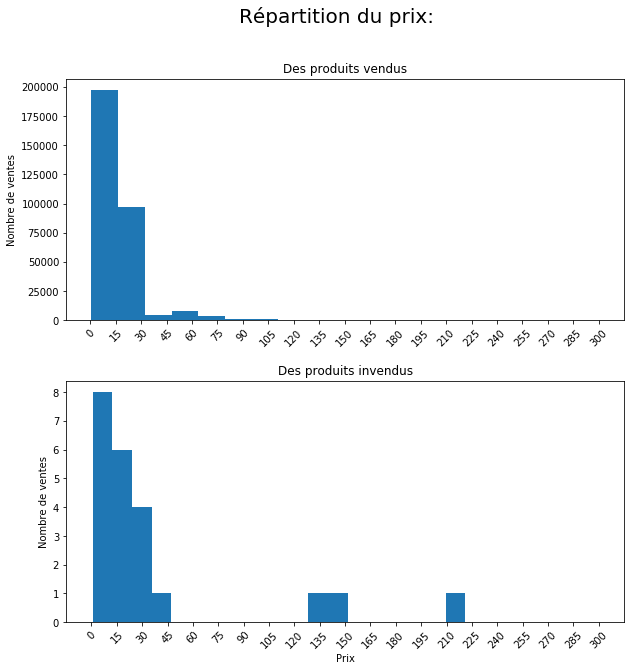

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

fig.suptitle('Répartition du prix:', fontsize=20)
plt.gcf().subplots_adjust(hspace = 0.25)

ax1.set_title('Des produits vendus')
ax1.set_ylabel('Nombre de ventes')
ax1.tick_params(axis='x', rotation=45)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, 315, 15))
ax1.hist(vente['price'], bins=19) 

ax2.set_title('Des produits invendus')
ax2.set_xlabel('Prix')
ax2.set_ylabel('Nombre de ventes')
ax2.tick_params(axis='x', rotation=45)
plt.xlim(-15,315)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(0, 315, 15))
ax2.hist(produit_non_vendu['price'], bins=19)

plt.savefig('graph/014_Repartition_du_prix.jpg', bbox_inches='tight')
plt.show()

<p style='color:#88cc8d;text-align:center'>
    bins = 19 pour le premier histogramme, selon la formule alternative de la règle de Sturges k = 1 + <sup>10</sup>&#8260;<sub>3 </sub>log<sub>10</sub> N<br/> 
</p>

<p style='color:#8677b2;text-align:center'>
    Rappel: Le poids des deux echantillons n'est pas équivalent, 22 individus pour les produits non vendus et 3 264 individus pour les produits vendu<br/> 
</p>

<a id='variable_price3'></a>
<h3 style='color:#8677b2'>Répartition par tranche de prix</h3>

[Haut de page](#sommaire)

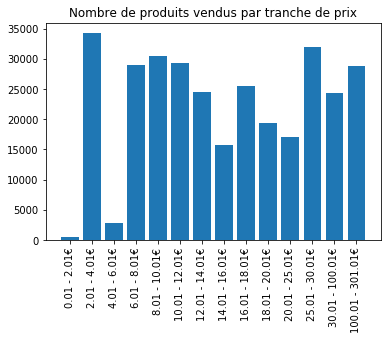

In [11]:
ventep = vente.groupby("tranche de prix").count()
ventep.reset_index(inplace=True)

tp = ['0.01 - 2.01€', '2.01 - 4.01€', '4.01 - 6.01€',
       '6.01 - 8.01€', '8.01 - 10.01€', '10.01 - 12.01€',
       '12.01 - 14.01€', '14.01 - 16.01€', '16.01 - 18.01€',
       '18.01 - 20.01€', '20.01 - 25.01€', '25.01 - 30.01€',
       '30.01 - 100.01€', '100.01 - 301.01€']

bars = ventep["id_prod"]

plt.title('Nombre de produits vendus par tranche de prix')
plt.xticks(rotation=90, ha='center')
plt.bar(tp, bars, label=tp)

plt.savefig('graph/015_Nombre_de_produits_vendus_par_tranche_de_prix', bbox_inches='tight')
plt.show()

<a id='ventes_partie_jour'></a>
<h3 style='color:#8677b2'>Ventes en fonction du moment de la journée</h3>

[Haut de page](#sommaire)

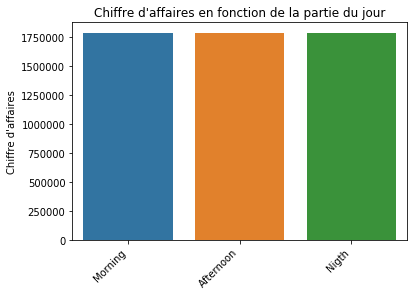

In [12]:
vente_partie_jour = vente.groupby('partie_jour', as_index=False).sum()

ca_vente_partie_jour = vente_partie_jour['price']

partie_jour_label = vente_partie_jour['partie_jour'].unique()

order = ["Morning", "Afternoon", "Nigth"]

sns.barplot(partie_jour_label, ca_vente_partie_jour, order=order)
plt.title('Chiffre d\'affaires en fonction de la partie du jour')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Chiffre d\'affaires')

plt.savefig('graph/016_chiffre_d_affaires_en_fonction_de_la_partie_du_jour', bbox_inches='tight')
plt.show()

<a id='ventes_journ'></a>
<h3 style='color:#8677b2'>Ventes journalières</h3>

[Haut de page](#sommaire)

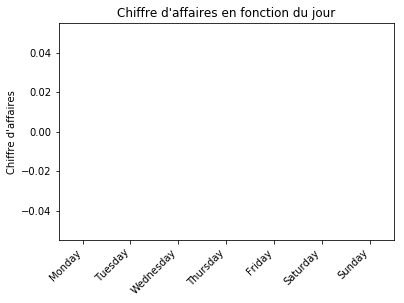

In [13]:
vente_jour_sem = vente.groupby('jour_sem', as_index=False).sum()

ca_vente_jour_sem = vente_jour_sem['price']

jour_sem_label = vente_jour_sem['jour_sem'].unique()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(jour_sem_label, ca_vente_jour_sem, order=order)
plt.title('Chiffre d\'affaires en fonction du jour')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Chiffre d\'affaires')

plt.savefig('graph/017_chiffre_d_affaires_en_fonction_du_jour', bbox_inches='tight')
plt.show()

<a id='ventes_mens'></a>
<h3 style='color:#8677b2'>Ventes mensuelles</h3>

[Haut de page](#sommaire)

In [14]:
"""vente_mois = vente.groupby('nom_mois', as_index=False).sum()

ca_vente_mois = vente_mois['price']

mois_label = vente_mois['nom_mois'].unique()

order = ['March', 'April', 'May', 'June', 'July', 'August',
         'September', 'October', 'November','December', 'January', 'February']

sns.barplot(mois_label, ca_vente_mois, order=order)
plt.title('Chiffre d\'affaires en fonction du mois')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Chiffre d\'affaires')

plt.savefig('graph/018_chiffre_d_affaires_en_fonction_du_mois', bbox_inches='tight')
plt.show()

ca_oct1 = vente_mois[vente_mois['nom_mois'] == 'October']
ca_oct = ca_oct1['price'].values
ca = vente_mois['price'].sum()
ca_moy = vente_mois['price'].mean()
baisse_oct = 100 * (ca_moy - ca_oct[0]) / ca_moy
print(f'Le chiffre d\'affaires à baissé en octobre de {baisse_oct:.2f}%')"""

"vente_mois = vente.groupby('nom_mois', as_index=False).sum()\n\nca_vente_mois = vente_mois['price']\n\nmois_label = vente_mois['nom_mois'].unique()\n\norder = ['March', 'April', 'May', 'June', 'July', 'August',\n         'September', 'October', 'November','December', 'January', 'February']\n\nsns.barplot(mois_label, ca_vente_mois, order=order)\nplt.title('Chiffre d'affaires en fonction du mois')\nplt.xticks(rotation=45, ha='right')\nplt.ylabel('Chiffre d'affaires')\n\nplt.savefig('graph/018_chiffre_d_affaires_en_fonction_du_mois', bbox_inches='tight')\nplt.show()\n\nca_oct1 = vente_mois[vente_mois['nom_mois'] == 'October']\nca_oct = ca_oct1['price'].values\nca = vente_mois['price'].sum()\nca_moy = vente_mois['price'].mean()\nbaisse_oct = 100 * (ca_moy - ca_oct[0]) / ca_moy\nprint(f'Le chiffre d'affaires à baissé en octobre de {baisse_oct:.2f}%')"

<a id='serie_temp'></a>
<h3 style='color:#8677b2'>Séries temporelles</h3>

[Haut de page](#sommaire)

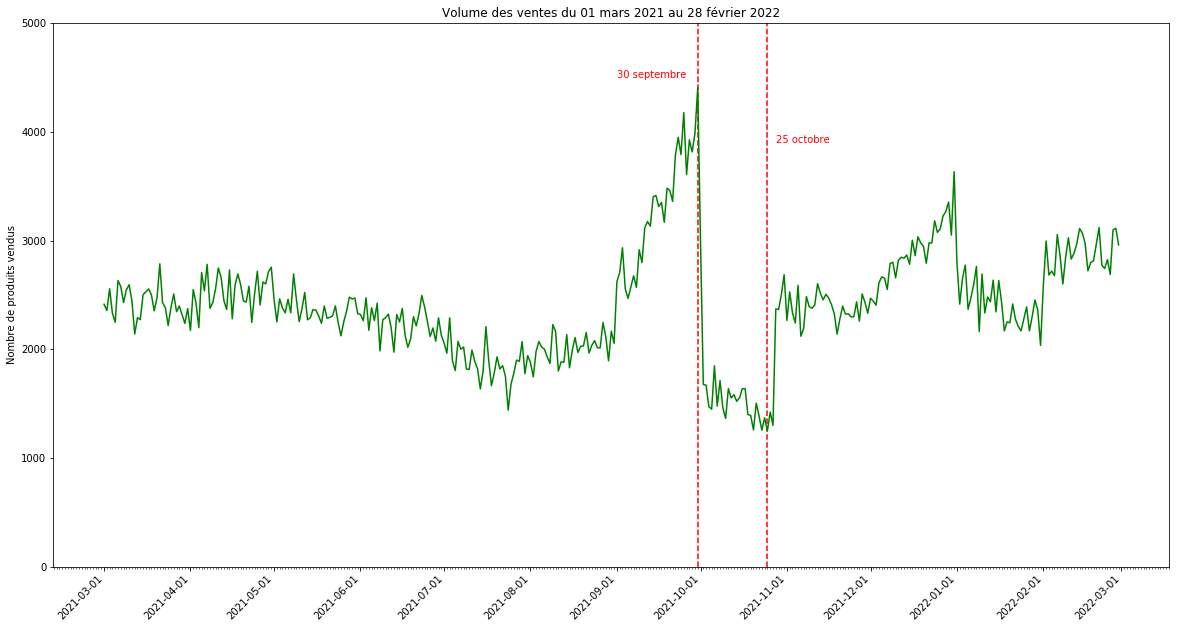

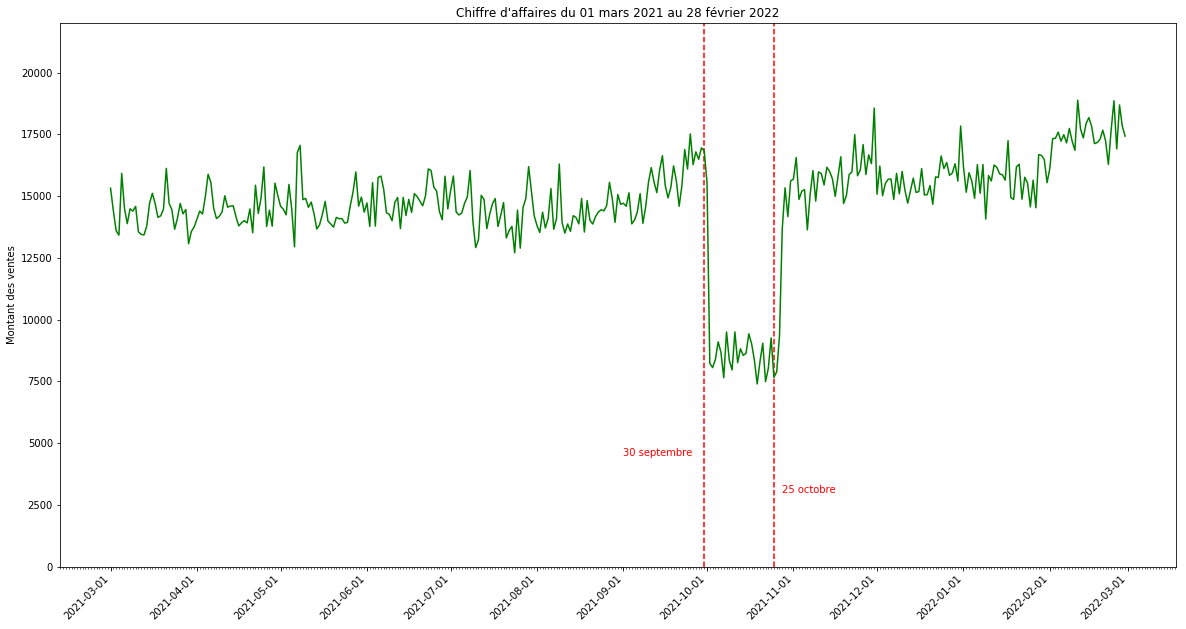

In [15]:
conv = np.vectorize(mdates.strpdate2num('%Y-%m-%d'))

#Graph du nombre de produits vendus à l'année
vente2 = vente.groupby(['date'], as_index=False).sum()
vente2['date'] = pd.to_datetime(vente2['date'])

days = mdates.DayLocator()
months = mdates.MonthLocator()
dateFmt = mdates.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(days)

ax.axvline(conv('2021-09-30'), linestyle='--', color='red')
ax.text('2021-09-01', 4500, '30 septembre', color='red')
ax.axvline(conv('2021-10-25'), linestyle='--', color='red')
ax.text('2021-10-28', 3900, '25 octobre', color='red')

ax.set_title('Volume des ventes du 01 mars 2021 au 28 février 2022')
ax.set_ylabel('Nombre de produits vendus')
ax.set_ylim(0,5000)
ax.plot(vente2['date'], vente2['taille_panier_session'], color='green')

plt.savefig('graph/019_volume_des_ventes.jpg')
plt.show()

#Graph du montants des ventes annuelles
days = mdates.DayLocator()
months = mdates.MonthLocator()
dateFmt = mdates.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(days)

ax.axvline(conv('2021-09-30'), linestyle='--', color='red')
ax.text('2021-09-01', 4500, '30 septembre', color='red')
ax.axvline(conv('2021-10-25'), linestyle='--', color='red')
ax.text('2021-10-28', 3000, '25 octobre', color='red')

ax.set_title('Chiffre d\'affaires du 01 mars 2021 au 28 février 2022')
ax.set_ylabel('Montant des ventes')
ax.set_ylim(0,22000)
ax.plot(vente2['date'], vente2['price'], color='green')
plt.savefig('graph/020_chiffre_d_affaires.jpg')
plt.show()

<a id='serie_temp1'></a>
<h3 style='color:#8677b2'>Séries temporelles septembre, octobre et novembre</h3>

[Haut de page](#sommaire)

In [16]:
"""vente21 = vente[(vente['nom_mois'] == 'September') |
               (vente['nom_mois'] == 'October') |
               (vente['nom_mois'] == 'November')]
vente21 = vente21.groupby('date', as_index=False).sum()
vente21['date'] = pd.to_datetime(vente21['date'])

conv = np.vectorize(mdates.strpdate2num('%Y-%m-%d'))

#Graph du nombre de produits vendus à l'année

days = mdates.DayLocator()
months = mdates.MonthLocator()
dateFmt = mdates.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(days)

ax.axvline(conv('2021-09-30'), linestyle='--', color='red')
ax.text('2021-10-01', 4500, '30 septembre', color='red')
ax.axvline(conv('2021-10-25'), linestyle='--', color='red')
ax.text('2021-10-26', 3900, '25 octobre', color='red')

ax.set_title('Volume des ventes du 01 septembre 2021 au 30 novembre 2022')
ax.set_ylabel('Nombre de produits vendus')
ax.set_ylim(0,5000)
ax.plot(vente21['date'], vente21['taille_panier_session'], color='green')

plt.savefig('graph/021_volume_des_ventes_trimestre.jpg')
plt.show()



#Graph du montants des ventes annuelles
days = mdates.DayLocator()
months = mdates.MonthLocator()
dateFmt = mdates.DateFormatter('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(days)

ax.axvline(conv('2021-09-30'), linestyle='--', color='red')
ax.text('2021-10-01', 4500, '30 septembre', color='red')
ax.axvline(conv('2021-10-25'), linestyle='--', color='red')
ax.text('2021-10-26', 3000, '25 octobre', color='red')

ax.set_title('Chiffre d\'affaires du 01 septembre 2021 au 30 novembre 2022')
ax.set_ylabel('Montant des ventes')
ax.set_ylim(0,22000)
ax.plot(vente21['date'], vente21['price'], color='green')
plt.savefig('graph/022_chiffre_d_affaires_trimestre.jpg')
plt.show()"""

"vente21 = vente[(vente['nom_mois'] == 'September') |\n               (vente['nom_mois'] == 'October') |\n               (vente['nom_mois'] == 'November')]\nvente21 = vente21.groupby('date', as_index=False).sum()\nvente21['date'] = pd.to_datetime(vente21['date'])\n\nconv = np.vectorize(mdates.strpdate2num('%Y-%m-%d'))\n\n#Graph du nombre de produits vendus à l'année\n\ndays = mdates.DayLocator()\nmonths = mdates.MonthLocator()\ndateFmt = mdates.DateFormatter('%Y-%m-%d')\n\nfig, ax = plt.subplots(figsize=(20,10))\nplt.xticks(rotation=45, ha='right')\n\nax.xaxis.set_major_locator(months)\nax.xaxis.set_major_formatter(dateFmt)\nax.xaxis.set_minor_locator(days)\n\nax.axvline(conv('2021-09-30'), linestyle='--', color='red')\nax.text('2021-10-01', 4500, '30 septembre', color='red')\nax.axvline(conv('2021-10-25'), linestyle='--', color='red')\nax.text('2021-10-26', 3900, '25 octobre', color='red')\n\nax.set_title('Volume des ventes du 01 septembre 2021 au 30 novembre 2022')\nax.set_ylabel('No

In [17]:
vente_jour = vente.groupby('date', as_index=False).sum()
vol_jour3009 = vente_jour[vente_jour['date'] == '2021 09 30']
vol_jour3009 = vol_jour3009['taille_panier_session'].values

vol_jour0210 = vente_jour[vente_jour['date'] == '2021 10 02']
vol_jour0210 = vol_jour0210['taille_panier_session'].values

print(f'Le volume de ventes est passé de {vol_jour3009[0]:.0f} ventes (le 30.09) à {vol_jour0210[0]:.0f} ventes (le 02.10)')

vol_jour2510 = vente_jour[vente_jour['date'] == '2021 10 25']
vol_jour2510 = vol_jour2510['taille_panier_session'].values

vol_jour2910 = vente_jour[vente_jour['date'] == '2021 10 29']
vol_jour2910 = vol_jour2910['taille_panier_session'].values

print(f'\nLe volume de ventes est passé de {vol_jour2510[0]:.0f} ventes (le 25.10) à {vol_jour2910[0]:.0f} ventes (le 29.10)')


ca_jour3009 = vente_jour[vente_jour['date'] == '2021 09 30']
ca_jour3009 = ca_jour3009['price'].values

ca_jour0210 = vente_jour[vente_jour['date'] == '2021 10 02']
ca_jour0210 = ca_jour0210['price'].values

print(f'\nLe chiffre d\'affaires est passé de {ca_jour3009[0]:.0f} € (le 30.09) à {ca_jour0210[0]:.0f} € (le 02.10)')

ca_jour2510 = vente_jour[vente_jour['date'] == '2021 10 25']
ca_jour2510 = ca_jour2510['price'].values

ca_jour2910 = vente_jour[vente_jour['date'] == '2021 10 29']
ca_jour2910 = ca_jour2910['price'].values

print(f'\nLe chiffre d\'affaires est passé de {ca_jour2510[0]:.0f} € (le 25.10) à {ca_jour2910[0]:.0f} € (le 29.10)')

Le volume de ventes est passé de 4406 ventes (le 30.09) à 1677 ventes (le 02.10)

Le volume de ventes est passé de 1250 ventes (le 25.10) à 2366 ventes (le 29.10)

Le chiffre d'affaires est passé de 16828 € (le 30.09) à 8232 € (le 02.10)

Le chiffre d'affaires est passé de 7664 € (le 25.10) à 15335 € (le 29.10)


## Mission 3

<a id='sex_categ'></a>
<h3 style='color:#8677b2'>Y a-t-il une corrélation entre le sexe des clients et les catégories de produits? (Q1)

[Haut de page](#sommaire)

<h3 style='color:#8677b2'>Tableau de contingence</h3>

In [18]:
vente[['sex', 'categ']].dtypes

sex      object
categ     int32
dtype: object

In [19]:
X = "categ"
Y = "sex"

c = vente[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
cont = c.copy()

tx = vente[X].value_counts()
ty = vente[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total", "Total"] = len(vente)

cont.dtypes

sex
f        float64
m        float64
Total    float64
dtype: object

<h3 style='color:#8677b2'>Résultats attendus en cas d'indépendance</h3>

In [20]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)

tx.columns = ["foo"]
ty.columns = ["foo"]

n = len(vente)

indep = tx.dot(ty.T) / n
indep

,f,m
0,101487.027747,93683.972253
1,53364.005014,49260.994986
2,8192.967240,7563.032760


<h3 style='color:#8677b2'>Calcul de \(\xi\)<sub>ij</sub> pour chaque case</h3>

In [21]:
mesure = (c-indep)**2/indep
mesure

sex,f,m
categ,,
0,1.132557,1.226889
1,3.149986,3.412353
2,0.614716,0.665917


<h3 style='color:#8677b2'>Calcul de \(\xi\)<sub>n</sub></h3>

In [22]:
xi_n = mesure.sum().sum()
xi_n

10.202417277273174

<h3 style='color:#8677b2'>Normalisation de \(\xi\)<sub>ij</sub></h3>

In [23]:
mesure_norm = mesure/xi_n
mesure_norm

sex,f,m
categ,,
0,0.111009,0.120255
1,0.308749,0.334465
2,0.060252,0.065270


<h3 style='color:#8677b2'>Représentation graphique</h3>

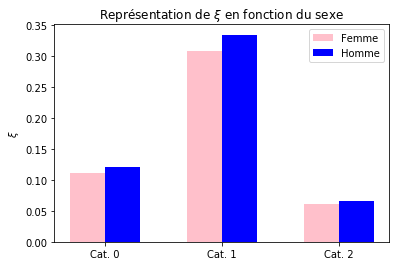

In [24]:
barWidth = 0.3

bars1 = mesure_norm['f']

bars2 = mesure_norm['m']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.title(r'Représentation de $\xi$ en fonction du sexe')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Cat. 0', 'Cat. 1', 'Cat. 2'])
plt.ylabel(r'$\xi$')

plt.bar(r1, bars1, width=barWidth, color='pink', label='Femme')
plt.bar(r2, bars2, width=barWidth, color='blue', label='Homme')
plt.legend()

plt.savefig('graph/023_Représentation_de_xi_en_fonction_du_sexe_et_de_la_categorie.jpg', bbox_inches='tight')
plt.show()

<a id='age_montant'></a>
<h3 style='color:#8677b2'>Y a-t-il une corrélation en l'âge des clients et le montant total des achats? (Q2.1)</h3>

[Haut de page](#sommaire)

Covariance empirique: -2470.78
Coefficient de Pearson: -0.75
Coefficient de détermination: 0.56


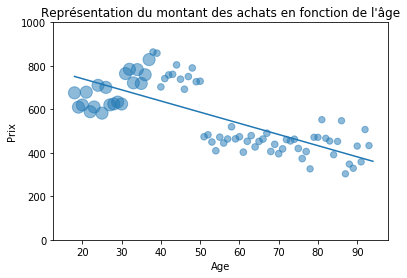

In [25]:
vente6 = vente.groupby(['client_id', 'age', 'tranche d\'age'], as_index=False).sum()
vente3 = vente6.groupby(['age', 'tranche d\'age'], as_index=False).mean()

s = vente.groupby('age').count()

pear = st.pearsonr(vente3['age'], vente3['price'])[0]
cov = np.cov(vente3['age'], vente3['price'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov:.2f}\n\
Coefficient de Pearson: {pear:.2f}\n\
Coefficient de détermination: {pear**2:.2f}')

Y = vente3['price']
X = vente3[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a, b = result.params['age'], result.params['intercept']


plt.title('Représentation du montant des achats en fonction de l\'âge')
plt.xlabel('Age')
plt.ylabel('Prix')
plt.ylim(0,1000)
plt.plot(np.arange(18, 95, 1), [a*x+b for x in np.arange(18, 95, 1)])
plt.scatter(vente3['age'], vente3['price'], s=s*0.02, alpha=0.5)

plt.savefig('graph/024_Representation_du_montant_des_achats_en_fonction_de_l_age.jpg', bbox_inches='tight')
plt.show()

<p style='color:#8677b2;text-align:center'>
    On peut remarquer trois segments différents (18-30ans, 30-50ans et 50-93ans)<br/>
</p>

<h3 style='color:#8677b2'>Régression linéaire sur le segment 18-30 ans</h3>

Pour les 18 ans:
Covariance empirique: -11.89
Coefficient de Pearson: -0.08
Coefficient de détermination: 0.01



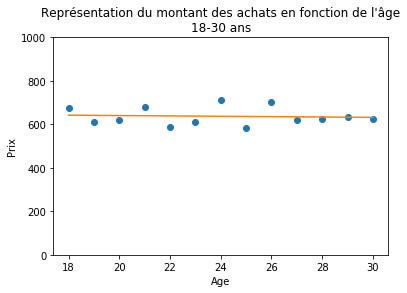

In [26]:
t1 = vente3[vente3['age'] <= 30]
pear1 = st.pearsonr(t1['age'], t1['price'])[0]
cov1 = np.cov(t1['age'], t1['price'] ,ddof=0)[1,0]

print(f'Pour les 18 ans:\n\
Covariance empirique: {cov1:.2f}\n\
Coefficient de Pearson: {pear1:.2f}\n\
Coefficient de détermination: {pear1**2:.2f}\n')

Y1 = t1['price']
X1 = t1[['age']]
X1 = X1.copy()
X1['intercept'] = 1.
result1 = sm.OLS(Y1, X1).fit()
a1, b1 = result1.params['age'], result1.params['intercept']

plt.title('Représentation du montant des achats en fonction de l\'âge\n18-30 ans')
plt.xlabel('Age')
plt.ylabel('Prix')
plt.ylim(0,1000)
plt.plot(t1.age, t1.price, "o")
plt.plot(np.arange(18, 31, 1), [a1*x+b1 for x in np.arange(18, 31, 1)])

plt.savefig('graph/025_Representation_du_montant_des_achats_en_fonction_de_l_age_18_30.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment 31-50 ans</h3>

Covariance empirique: -61.27
Coefficient de Pearson: -0.23
Coefficient de détermination: 0.05


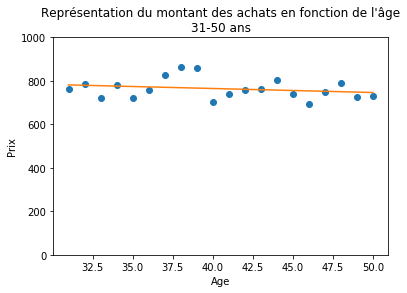

In [27]:
t2 = vente3[(vente3['age'] > 30) & (vente3['age'] <= 50)]
pear2 = st.pearsonr(t2['age'], t2['price'])[0]
cov2 = np.cov(t2['age'], t2['price'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov2:.2f}\n\
Coefficient de Pearson: {pear2:.2f}\n\
Coefficient de détermination: {pear2**2:.2f}')

Y2 = t2['price']
X2 = t2[['age']]
X2 = X2.copy()
X2['intercept'] = 1.
result2 = sm.OLS(Y2, X2).fit()
a2, b2 = result2.params['age'], result2.params['intercept']

plt.title('Représentation du montant des achats en fonction de l\'âge\n31-50 ans')
plt.xlabel('Age')
plt.ylabel('Prix')
plt.ylim(0,1000)
plt.plot(t2.age, t2.price, "o")
plt.plot(np.arange(31, 51, 1),[a2*x+b2 for x in np.arange(31, 51, 1)])

plt.savefig('graph/026_Representation_du_montant_des_achats_en_fonction_de_l_age_31_50.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment des plus de 50 ans</h3>

Covariance empirique: -192.38
Coefficient de Pearson: -0.29
Coefficient de détermination: 0.08


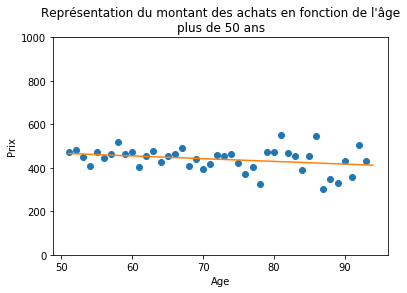

In [28]:
t3 = vente3[vente3['age'] > 50]
pear3 = st.pearsonr(t3['age'], t3['price'])[0]
cov3 = np.cov(t3['age'], t3['price'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov3:.2f}\n\
Coefficient de Pearson: {pear3:.2f}\n\
Coefficient de détermination: {pear3**2:.2f}')

Y3 = t3['price']
X3 = t3[['age']]
X3 = X3.copy()
X3['intercept'] = 1.
result3 = sm.OLS(Y3, X3).fit()
a3, b3 = result3.params['age'], result3.params['intercept']

plt.title('Représentation du montant des achats en fonction de l\'âge\nplus de 50 ans')
plt.xlabel('Age')
plt.ylabel('Prix')
plt.ylim(0,1000)
plt.plot(t3.age, t3.price, "o")
plt.plot(np.arange(51, 95, 1), [a3*x+b3 for x in np.arange(51, 95, 1)])

plt.savefig('graph/027_Representation_du_montant_des_achat_en_fonction_de_l_age_des_plus_de_50.jpg')
plt.show()

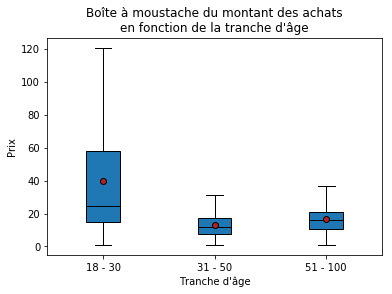

Eta carré: 0.89


In [29]:
Xa = 'tranche d\'age' # qualitative
Ya = 'price' # quantitative


modalitesa = ['18 - 30', '31 - 50', '51 - 100']
groupesa = []

for m in modalitesa:
    groupesa.append(vente[vente[Xa] == m][Ya])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
   
plt.title('Boîte à moustache du montant des achats\nen fonction de la tranche d\'âge')
plt.ylabel('Prix')
plt.xlabel('Tranche d\'âge')
plt.boxplot(groupesa, labels=modalitesa, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('graph/028_Boite_a_moustache_du_montant_des_achats_en_fonction_de_la_tranche_d_age.jpg')
plt.show()

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print(f'Eta carré: {eta_squared(vente3[Xa],vente3[Ya]):.2f}')

<a id='age_freq_mens'></a>
<h3 style='color:#8677b2'>Y a-t-il un corrélation entre l'âge des clients et la fréquence d'achat mensuelle? (Q2.2)</h3>

[Haut de page](#sommaire)

Covariance empirique: -0.26
Coefficient de Pearson: -0.42
Coefficient de détermination: 0.17


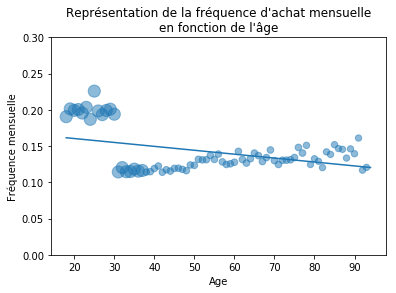

In [30]:
vente4 = vente.groupby(['age', 'tranche d\'age1'], as_index=False).mean()
vente4['freq_mens'] = vente4['achat_mens'] / vente4['achat_an']
peara = st.pearsonr(vente4['age'], vente4['freq_mens'])[0]
cova = np.cov(vente4['age'], vente4['freq_mens'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cova:.2f}\n\
Coefficient de Pearson: {peara:.2f}\n\
Coefficient de détermination: {peara**2:.2f}')

Yz = vente4['freq_mens']
Xz = vente4[['age']]
Xz = Xz.copy()
Xz['intercept'] = 1.
resultz = sm.OLS(Yz, Xz).fit()
az, bz = resultz.params['age'], resultz.params['intercept']

plt.title('Représentation de la fréquence d\'achat mensuelle\nen fonction de l\'âge')
plt.xlabel('Age')
plt.ylabel('Fréquence mensuelle')
plt.ylim(0,0.3)
plt.scatter(vente4['age'], vente4['freq_mens'], s=s*0.02, alpha=0.5)
plt.plot(np.arange(18, 95, 1), [az*x+bz for x in np.arange(18, 95, 1)])

plt.savefig('graph/029_Representation_de_la_frequence_achat_en_fonction_de_la_frequence.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment 18-30 ans</h3>

Covariance empirique: 0.00
Coefficient de Pearson: 0.06
Coefficient de détermination: 0.00


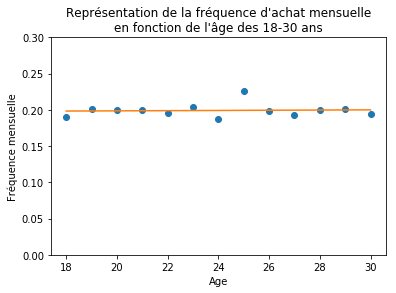

In [31]:
t4 = vente4[vente4['age'] <= 30]
pear4 = st.pearsonr(t4['age'], t4['freq_mens'])[0]
cov4 = np.cov(t4['age'], t4['freq_mens'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov4:.2f}\n\
Coefficient de Pearson: {pear4:.2f}\n\
Coefficient de détermination: {pear4**2:.2f}')

Y4 = t4['freq_mens']
X4 = t4[['age']]
X4 = X4.copy()
X4['intercept'] = 1.
result4 = sm.OLS(Y4, X4).fit()
a4, b4 = result4.params['age'], result4.params['intercept']

plt.title('Représentation de la fréquence d\'achat mensuelle\nen fonction de l\'âge des 18-30 ans')
plt.xlabel('Age')
plt.ylabel('Fréquence mensuelle')
plt.ylim(0,0.3)
plt.plot(t4.age, t4.freq_mens, "o")
plt.plot(np.arange(18, 31, 1), [a4*x+b4 for x in np.arange(18, 31, 1)])

plt.savefig('graph/030_Representation_de_la_frequence_achat_en_fonction_de_la_frequence_18_30.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment des plus de 30 ans</h3>

Covariance empirique: 0.14
Coefficient de Pearson: 0.69
Coefficient de détermination: 0.48


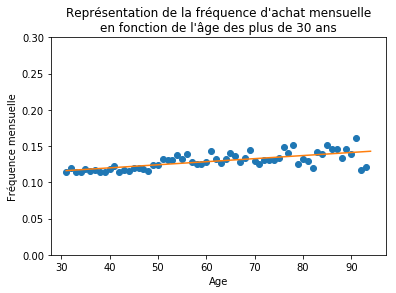

In [32]:
t6 = vente4[vente4['age'] > 30]
pear6 = st.pearsonr(t6['age'], t6['freq_mens'])[0]
cov6 = np.cov(t6['age'], t6['freq_mens'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov6:.2f}\n\
Coefficient de Pearson: {pear6:.2f}\n\
Coefficient de détermination: {pear6**2:.2f}')

Y6 = t6['freq_mens']
X6 = t6[['age']]
X6 = X6.copy()
X6['intercept'] = 1.
result6 = sm.OLS(Y6, X6).fit()
a6, b6 = result6.params['age'], result6.params['intercept']

plt.title('Représentation de la fréquence d\'achat mensuelle\nen fonction de l\'âge des plus de 30 ans')
plt.xlabel('Age')
plt.ylabel('Fréquence mensuelle')
plt.ylim(0,0.3)
plt.plot(t6.age, t6.freq_mens, "o")
plt.plot(np.arange(31, 95, 1),[a6*x+b6 for x in np.arange(31, 95, 1)])

plt.savefig('graph/031_Representation_de_la_frequence_achat_en_fonction_de_la_frequence_des_plus_de_30.jpg')
plt.show()

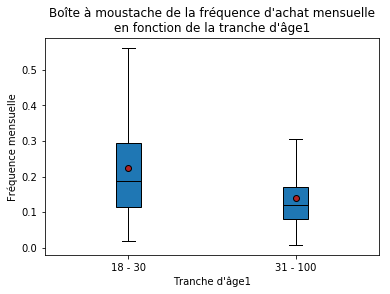

Eta carré: 0.86


In [33]:
Xb = 'tranche d\'age1' # qualitative
Yb = 'freq_mens' # quantitative


modalitesb = ['18 - 30', '31 - 100']
groupesb = []

for m in modalitesb:
    groupesb.append(vente[vente[Xb] == m][Yb])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
   
plt.title('Boîte à moustache de la fréquence d\'achat mensuelle\nen fonction de la tranche d\'âge1')
plt.ylabel('Fréquence mensuelle')
plt.xlabel('Tranche d\'âge1')
plt.boxplot(groupesb, labels=modalitesb, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('graph/032_Boite_a_moustache_de_la_frequence_achat_mens_en_fonction_de_la_tranche_d_age1.jpg')
plt.show()

print(f'Eta carré: {eta_squared(vente4[Xb], vente4[Yb]):.2f}')

<a id='age_panier'></a>
<h3 style='color:#8677b2'>Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen(Q2.3)</h3>

[Haut de page](#sommaire)

Covariance empirique: -6.55
Coefficient de Pearson: -0.66
Coefficient de détermination: 0.43


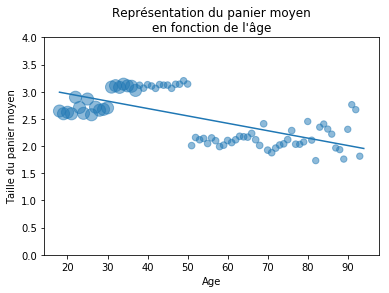

In [34]:
vente5=vente.groupby(['age', 'tranche d\'age'], as_index=False).mean()
pearb = st.pearsonr(vente5['age'], vente5['taille_panier_session'])[0]

covb = np.cov(vente5['age'], vente5['taille_panier_session'] ,ddof=0)[1,0]
print(f'Covariance empirique: {covb:.2f}\n\
Coefficient de Pearson: {pearb:.2f}\n\
Coefficient de détermination: {pearb**2:.2f}')

Yy = vente5['taille_panier_session']
Xy = vente5[['age']]
Xy = Xy.copy()
Xy['intercept'] = 1.
resulty = sm.OLS(Yy, Xy).fit()
ay, by = resulty.params['age'], resulty.params['intercept']

plt.title('Représentation du panier moyen\nen fonction de l\'âge')
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.ylim(0,4)
plt.scatter(vente5['age'], vente5['taille_panier_session'], s=s*0.02, alpha=0.5)
plt.plot(np.arange(18, 95, 1), [ay*x+by for x in np.arange(18, 95, 1)])

plt.savefig('graph/033_Representation_du_panier_moyen_en_fonction_de_l_age.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment 18-30 ans</h3>

Covariance empirique: 0.06
Coefficient de Pearson: 0.17
Coefficient de détermination: 0.03


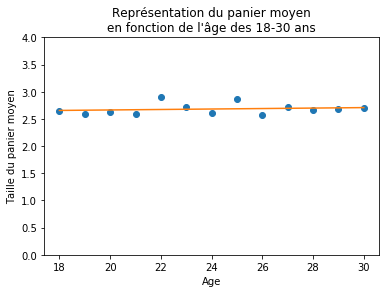

In [35]:
t7 = vente5[vente5['age'] <= 30]
pear7 = st.pearsonr(t7['age'], t7['taille_panier_session'])[0]
cov7 = np.cov(t7['age'], t7['taille_panier_session'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov7:.2f}\n\
Coefficient de Pearson: {pear7:.2f}\n\
Coefficient de détermination: {pear7**2:.2f}')

Y7 = t7['taille_panier_session']
X7 = t7[['age']]
X7 = X7.copy()
X7['intercept'] = 1.
result7 = sm.OLS(Y7, X7).fit()
a7, b7 = result7.params['age'], result7.params['intercept']

plt.title('Représentation du panier moyen\nen fonction de l\'âge des 18-30 ans')
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.ylim(0,4)
plt.plot(t7.age, t7.taille_panier_session, "o")
plt.plot(np.arange(18, 31, 1),[a7*x+b7 for x in np.arange(18, 31, 1)])

plt.savefig('graph/034_Representation_du_panier_moyen_en_fonction_de_l_age_18_30.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment 31-50 ans</h3>

Covariance empirique: 0.10
Coefficient de Pearson: 0.45
Coefficient de détermination: 0.20


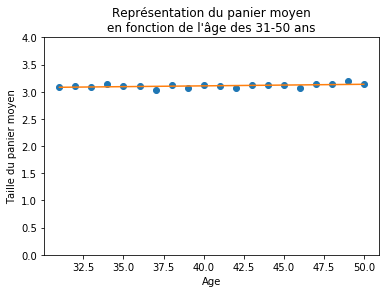

In [36]:
t8 = vente5[(vente5['age'] > 30) & (vente5['age'] <= 50)]
pear8 = st.pearsonr(t8['age'], t8['taille_panier_session'])[0]
cov8 = np.cov(t8['age'], t8['taille_panier_session'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov8:.2f}\n\
Coefficient de Pearson: {pear8:.2f}\n\
Coefficient de détermination: {pear8**2:.2f}')

Y8 = t8['taille_panier_session']
X8 = t8[['age']]
X8 = X8.copy()
X8['intercept'] = 1.
result8 = sm.OLS(Y8, X8).fit()
a8, b8 = result8.params['age'], result8.params['intercept']

plt.title('Représentation du panier moyen\nen fonction de l\'âge des 31-50 ans')
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.ylim(0,4)
plt.plot(t8.age, t8.taille_panier_session, "o")
plt.plot(np.arange(31, 51, 1), [a8*x+b8 for x in np.arange(31, 51, 1)])

plt.savefig('graph/035_Representation_du_panier_moyen_en_fonction_de_l_age_31_51.jpg')
plt.show()

<h3 style='color:#8677b2'>Régression linéaire sur le segment des plus de 50 ans</h3>

Covariance empirique: 0.49
Coefficient de Pearson: 0.19
Coefficient de détermination: 0.04


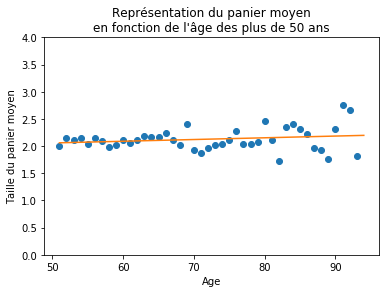

In [37]:
t9 = vente5[vente5['age'] > 50]
pear9 = st.pearsonr(t9['age'], t9['taille_panier_session'])[0]
cov9 = np.cov(t9['age'], t9['taille_panier_session'] ,ddof=0)[1,0]

print(f'Covariance empirique: {cov9:.2f}\n\
Coefficient de Pearson: {pear9:.2f}\n\
Coefficient de détermination: {pear9**2:.2f}')

Y9 = t9['taille_panier_session']
X9 = t9[['age']]
X9 = X9.copy()
X9['intercept'] = 1.
result9 = sm.OLS(Y9, X9).fit()
a9, b9 = result9.params['age'], result9.params['intercept']

plt.title('Représentation du panier moyen\nen fonction de l\'âge des plus de 50 ans')
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.ylim(0,4)
plt.plot(t9.age, t9.taille_panier_session, "o")
plt.plot(np.arange(51, 95, 1), [a9*x+b9 for x in np.arange(51, 95, 1)])

plt.savefig('graph/036_Representation_du_panier_moyen_en_fonction_de_l_age_plus_de_50.jpg')
plt.show()

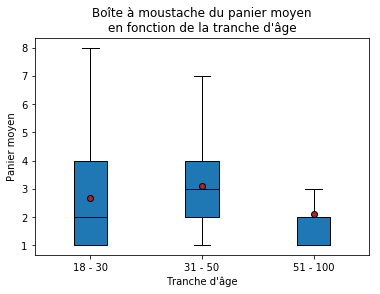

Eta carré: 0.88


In [38]:
Xc = 'tranche d\'age' # qualitative
Yc = 'taille_panier_session' # quantitative


modalitesc = ['18 - 30', '31 - 50', '51 - 100']#vente['tranche d\'age'].unique()
groupesc = []

for m in modalitesc:
    groupesc.append(vente[vente[Xc] == m][Yc])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
   
plt.title('Boîte à moustache du panier moyen\nen fonction de la tranche d\'âge')
plt.ylabel('Panier moyen')
plt.xlabel('Tranche d\'âge')
plt.boxplot(groupesc, labels=modalitesc, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('graph/037_Boite_a_moustache_du_panier_moyen_en_fonction_de_la_tranche_d_age.jpg')
plt.show()

print(f'Eta carré: {eta_squared(vente5[Xc],vente5[Yc]):.2f}')

<a id='age_categ'></a>
<h3 style='color:#8677b2'>Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés? (Q2.4)</h3>

[Haut de page](#sommaire)

In [39]:
vente8 = vente.groupby(['id_prod', 'categ'], as_index=False).mean()

In [40]:
X10 = 'categ' # qualitative
Y10 = 'age' # quantitative

In [41]:
modalitesd = [0, 1, 2]
groupesd = []
for m in modalitesd:
    groupesd.append(vente8[vente8[X10]==m][Y10])

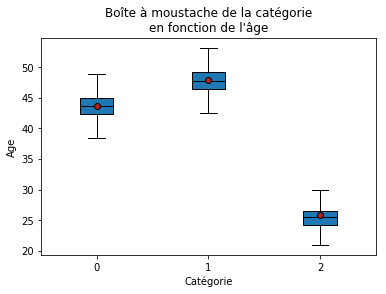

Eta carré: 0.65


2289    49.866667
2290    49.692308
2291    46.480519
2292    45.605263
2293    43.051282
2294    48.291139
2295    48.088235
2296    48.469697
2297    49.125000
2298    44.392157
2299    45.105263
2300    44.098361
2301    52.549020
2302    47.741935
2303    50.500000
2304    51.800000
2305    45.000000
2306    62.000000
2307    46.714286
2308    46.824324
2309    47.666667
2310    46.750000
2311    52.800000
2312    51.686275
2313    38.333333
2314    49.500000
2315    36.666667
2316    47.555556
2317    54.333333
2318    41.545455
          ...    
2996    52.000000
2997    45.474227
2998    46.000000
2999    49.159420
3000    50.424242
3001    43.687500
3002    49.800000
3003    46.724138
3004    48.250000
3005    47.482759
3006    48.104167
3007    44.421053
3008    43.824561
3009    46.837838
3010    50.088235
3011    47.700000
3012    46.300000
3013    49.560000
3014    50.464286
3015    48.390244
3016    48.253968
3017    49.485149
3018    48.595506
3019    44.642857
3020    49

In [42]:
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    

plt.title('Boîte à moustache de la catégorie\nen fonction de l\'âge')
plt.ylabel('Age')
plt.xlabel('Catégorie')
plt.boxplot(groupesd, labels=modalitesd, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.savefig('graph/038_Boite_a_moustache_de_la_categorie_en_fonction_de_l_age.jpg')
plt.show()

print(f'Eta carré: {eta_squared(vente8[X10],vente8[Y10]):.2f}')
groupesd[1]

In [43]:
X11 = 'categ'
Y11 = 'tranche d\'age'

c11 = vente[[X11,Y11]].pivot_table(index=X11, columns=Y11, aggfunc=len)
cont11 = c11.copy()

tx11 = vente[X11].value_counts()
ty11 = vente[Y11].value_counts()

cont11.loc[:,"Total"] = tx11
cont11.loc["total",:] = ty11
cont11.loc["total", "Total"] = len(vente)

tx11 = pd.DataFrame(tx11)
ty11 = pd.DataFrame(ty11)

tx11.columns = ["foo"]
ty11.columns = ["foo"]

n11 = len(vente)

indep11 = tx11.dot(ty11.T) / n11

mesure11 = (c11 - indep11) ** 2 / indep11

xi_n11 = mesure11.sum().sum()

mesure11_norm = mesure11 / xi_n11
xi_n11

137099.41052060697

In [44]:
cont11

tranche d'age,18 - 30,31 - 50,51 - 100,Total
categ,,,,
0,8346.0,150893.0,35932.0,195171.0
1,13532.0,44877.0,44216.0,102625.0
2,14487.0,574.0,695.0,15756.0
total,36365.0,196344.0,80843.0,313552.0


In [45]:
indep11

,31 - 50,51 - 100,18 - 30
0,122214.671965,50320.869116,22635.458919
1,64263.034521,26459.767040,11902.198439
2,9866.293514,4062.363844,1827.342642


In [46]:
mesure11

,18 - 30,31 - 50,51 - 100
categ,,,
0,9020.742055,6729.523433,4114.387491
1,223.173319,5848.126178,11915.592773
2,87704.911366,8751.687615,2791.266291


In [47]:
mesure11_norm

,18 - 30,31 - 50,51 - 100
categ,,,
0,0.065797,0.049085,0.030010
1,0.001628,0.042656,0.086912
2,0.639718,0.063835,0.020359


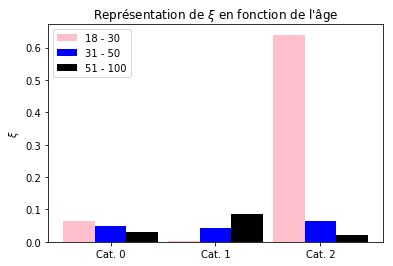

,18 - 30,31 - 50,51 - 100
categ,,,
0,0.065797,0.049085,0.030010
1,0.001628,0.042656,0.086912
2,0.639718,0.063835,0.020359


In [48]:
barWidth11 = 0.3

bars111 = mesure11_norm['18 - 30']

bars112 = mesure11_norm['31 - 50']

bars113 = mesure11_norm['51 - 100']

r111 = np.arange(len(bars1)) 
r112 = [x + barWidth for x in r111]
r113 = [x + 2 * barWidth for x in r111]

plt.title(r"Représentation de $\xi$ en fonction de l'âge")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Cat. 0', 'Cat. 1', 'Cat. 2'])
plt.ylabel(r'$\xi$')

plt.bar(r111, bars111, width=barWidth, color='pink', label='18 - 30')
plt.bar(r112, bars112, width=barWidth, color='blue', label='31 - 50')
plt.bar(r113, bars113, width=barWidth, color='black', label='51 - 100')
plt.legend()

plt.savefig('graph/039_Représentation_de_xi_en_fonction_de_l_age_et_de_la_categorie.jpg', bbox_inches='tight')
plt.show()
mesure11_norm

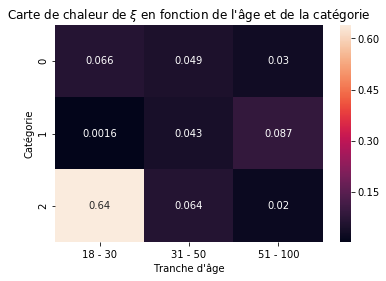

In [49]:
sns.heatmap(mesure11_norm, annot=mesure11_norm)
plt.title(r"Carte de chaleur de $\xi$ en fonction de l'âge et de la catégorie", y=1.03)
plt.ylabel('Catégorie')
plt.xlabel('Tranche d\'âge')
plt.savefig('graph/040_Carte_de_chaleur_de_xi_en_fonction_de_l_age_et_de_la_categorie.jpg')
plt.show()

[Haut de page](#sommaire)